# House Loan Data Analysis

### Deep Learning (Tensorflow with Keras)

### DESCRIPTION

#### For safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.


### Objective: 
#### Create a model that predicts whether or not an applicant will be able to repay a loan using historical data.

### Domain: Finance

#### Analysis to be done: Perform data preprocessing and build a deep learning prediction model.

## Performed the below tasks

**Step-1 Understanding the buisness problem/ problem statement**

**Step-2 Getting data (Importing by Pandas)**

**Step-3 Understanding about the data**

**Step-4 Data cleaning**

**Step-5 Data visualization**

**Step-6 EDA Exploratory data analysis**

**Step-7 Feature Engineering**

**(Print percentage of default to payer of the dataset for the TARGET column)**

**Step-8 Feature selection**

**Step-9 Splitting the data**

**Step-10 Model building** 

**Step-11 Prediction and accuracy**

**Step-12 Tunning and improving accuracy**

**(Balance the dataset if the data is imbalanced, Plot the balanced data or imbalanced data, Calculate Sensitivity as a metrice, Calculate area under receiver operating characteristics curve)**

### Importing Library 

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix

In [85]:
import warnings
warnings.filterwarnings('ignore')

In [86]:
# Those below are used to change the display options for pandas DataFrames 
# In order to display all the columns or rows of the DataFrame, respectively.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### **Step-1 Understanding the buisness problem/ problem statement**

#### Analysis to be done: Perform data preprocessing and build a deep learning prediction model.

### **Step-2 Getting data (Importing by Pandas)**

In [4]:

# Step 1: Load the dataset
df = pd.read_csv("House_Loan_Data.csv")  # Replace "your_dataset.csv" with the actual filename or path


### **Step-3 Understanding about the data**

In [5]:
# Get basic information about the data
print("Data shape:", df.shape)  # Number of rows and columns in the data

Data shape: (307511, 122)


In [6]:
print("\nData columns:", df.columns)  # Column names in the data


Data columns: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [7]:
print("\nData info:")
df.info()  # Detailed information about the data, including data types and missing values


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


```python
# Explore the first few rows of the data
print("\nFirst 5 rows of the data:")
df.head()
```

```python
# Perform statistical analysis on the data
print("\nData statistics:")
df.describe()
```

### **Step-4 Data cleaning**

```python
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())
```

In [11]:
# Drop columns with high missing value percentage
threshold = 0.8
df = df.dropna(thresh=threshold*len(df), axis=1)

In [12]:
# Drop rows with missing values
df = df.dropna()

In [13]:

# Remove duplicates
df = df.drop_duplicates()


In [14]:
# Handle outliers (Example: Removing outliers in 'AMT_INCOME_TOTAL' column)
lower_threshold = df['AMT_INCOME_TOTAL'].quantile(0.05)
upper_threshold = df['AMT_INCOME_TOTAL'].quantile(0.95)
df = df[(df['AMT_INCOME_TOTAL'] >= lower_threshold) & (df['AMT_INCOME_TOTAL'] <= upper_threshold)]


In [15]:
# Reset the index
df = df.reset_index(drop=True)


```python
# Print the cleaned dataset
print("\nCleaned dataset:")
df.head()
```

In [17]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CIT

In [18]:
# Get basic information about the data
print("Data shape:", df.shape)  # Number of rows and columns in the data

Data shape: (225433, 72)


### **Step-5 Data visualization**

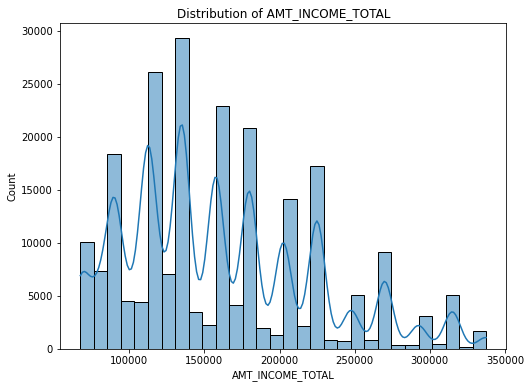

In [19]:
# Histogram of a numerical column
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='AMT_INCOME_TOTAL', bins=30, kde=True)
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Count')
plt.show()

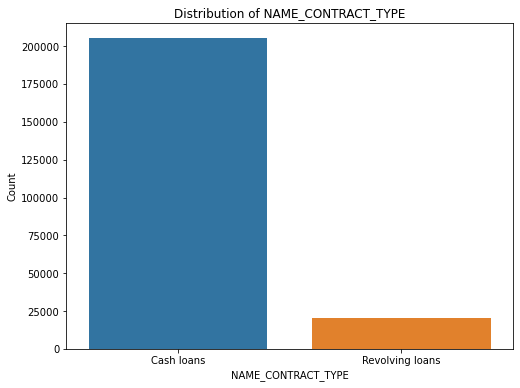

In [20]:

# Bar chart of a categorical column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NAME_CONTRACT_TYPE')
plt.title('Distribution of NAME_CONTRACT_TYPE')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Count')
plt.show()

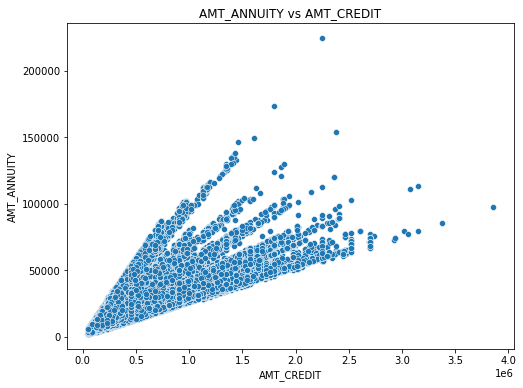

In [21]:
# Scatter plot of two numerical columns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='AMT_CREDIT', y='AMT_ANNUITY')
plt.title('AMT_ANNUITY vs AMT_CREDIT')
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')
plt.show()

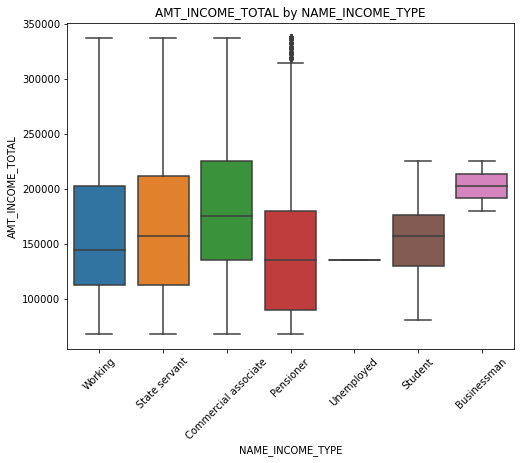

In [22]:
# Box plot of a numerical column grouped by a categorical column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL')
plt.title('AMT_INCOME_TOTAL by NAME_INCOME_TYPE')
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('AMT_INCOME_TOTAL')
plt.xticks(rotation=45)
plt.show()

### **Step-6 EDA Exploratory data analysis**

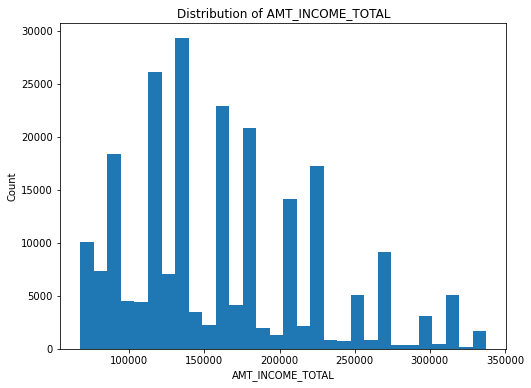

In [25]:

plt.figure(figsize=(8, 6))
plt.hist(df['AMT_INCOME_TOTAL'], bins=30)
plt.title("Distribution of AMT_INCOME_TOTAL")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("Count")
plt.show()

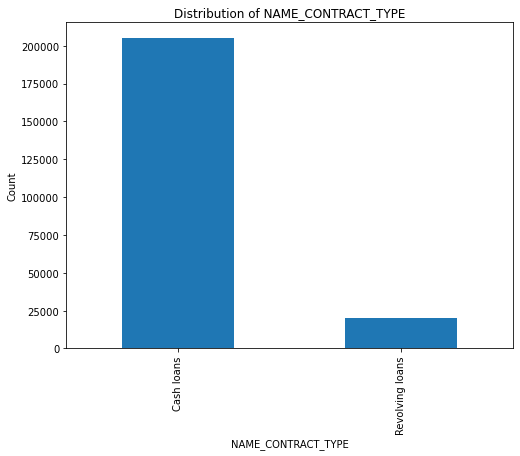

In [26]:
# Explore the distribution of a categorical column
plt.figure(figsize=(8, 6))
df['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar')
plt.title("Distribution of NAME_CONTRACT_TYPE")
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("Count")
plt.show()

### **Step-7 Feature Engineering**

In [28]:
# Drop irrelevant columns
df.drop(columns=['SK_ID_CURR'], inplace=True)

In [29]:
# Feature scaling
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold

scaler = StandardScaler()
numerical_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [30]:
# Encoding categorical variables
categorical_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
                    'ORGANIZATION_TYPE']

In [31]:
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [32]:
# Feature interaction
df['INCOME_CREDIT_RATIO'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']


In [33]:
# Feature selection
threshold = 0.9  # Set the threshold for variance
selector = VarianceThreshold(threshold=threshold)
selected_features = selector.fit_transform(df)

In [34]:
# Convert the selected features back to a DataFrame
selected_df = pd.DataFrame(selected_features, columns=df.columns[selector.get_support()])

In [35]:
# Concatenate the selected features with the target variable
target = df['TARGET']
final_df = pd.concat([selected_df, target], axis=1)


```pyhton 
# Check the final dataframe
final_df.head()
```

In [37]:
# Print percentage of defaults
default_percentage = final_df['TARGET'].mean() * 100
print("Percentage of defaults: {:.2f}%".format(default_percentage))

Percentage of defaults: 7.92%


### **Step-8 Feature selection**

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Separate the input features (X) and target variable (y)
x = final_df.iloc[:, :-1]  # Select all columns except the last one
y = final_df.iloc[:, -1]   # Select the last column


### **Step-9 Splitting the data**

In [41]:
# Split and standardise the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train_std=st.fit_transform(x_train)
x_test_std=st.fit_transform(x_test)

In [42]:
x_train_std.shape

(169074, 20)

### **Step-10 Model building** 

In [43]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from livelossplot import PlotLossesKerasTF
from tensorflow.keras.metrics import Precision,Recall

In [44]:
model=Sequential()
model.add(Input(shape=(20,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [45]:
from tensorflow.keras.optimizers import SGD

In [46]:
model.compile(loss='binary_crossentropy',optimizer=SGD(learning_rate=0.01),
              metrics=['accuracy',Precision(),Recall()])


### **Step-11 Prediction and accuracy**

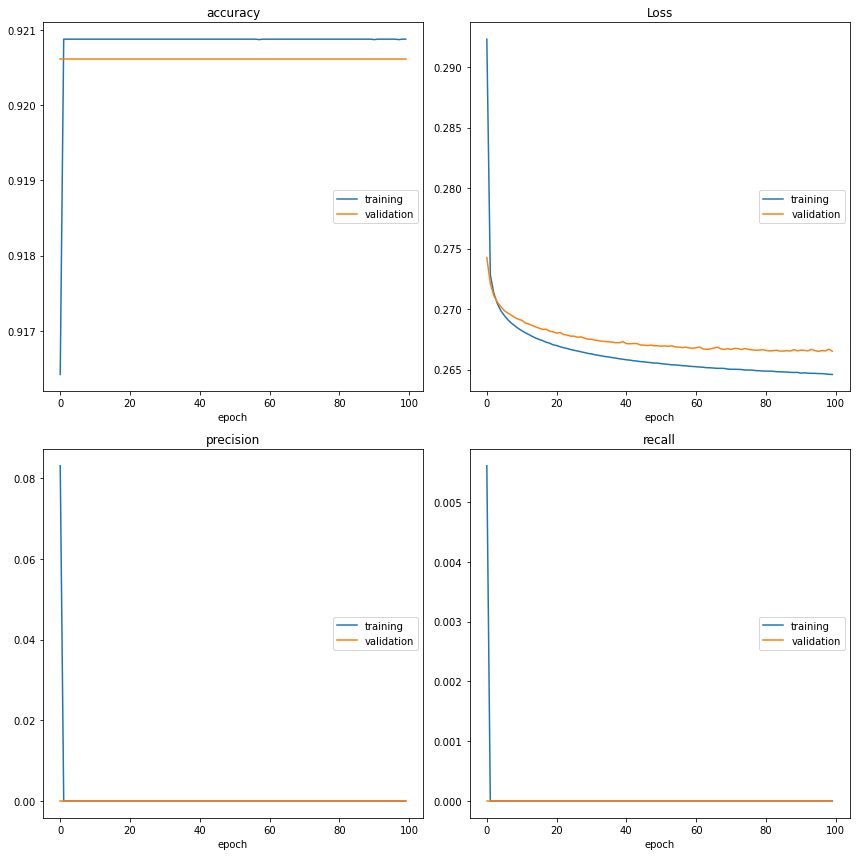

accuracy
	training         	 (min:    0.916, max:    0.921, cur:    0.921)
	validation       	 (min:    0.921, max:    0.921, cur:    0.921)
Loss
	training         	 (min:    0.265, max:    0.292, cur:    0.265)
	validation       	 (min:    0.267, max:    0.274, cur:    0.267)
precision
	training         	 (min:    0.000, max:    0.083, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
recall
	training         	 (min:    0.000, max:    0.006, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)


In [47]:
model.fit(x_train_std,y_train,epochs=100,batch_size=64,callbacks=[PlotLossesKerasTF()],validation_data=(x_test_std,y_test))

In [48]:
# Imbalance data
y_train.value_counts()

0    155696
1     13378
Name: TARGET, dtype: int64

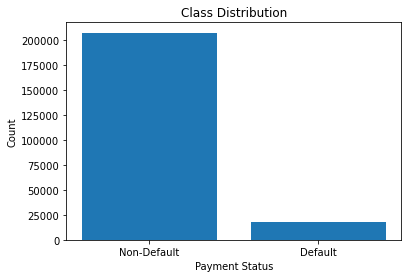

In [83]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data' with a column 'TARGET' indicating default payments

# Count the number of default and non-default payments
default_count = final_df[final_df['TARGET'] == 1].shape[0]
non_default_count = final_df[final_df['TARGET'] == 0].shape[0]

# Create a bar plot to visualize the class distribution
plt.bar(['Non-Default', 'Default'], [non_default_count, default_count])
plt.xlabel('Payment Status')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


### **Step-12 Tunning and improving accuracy**

In [50]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
x_train_smote,y_train_smote=smk.fit_resample(x,y)

In [51]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_smote)))

Original dataset shape Counter({0: 207581, 1: 17852})
Resampled dataset shape Counter({1: 207581, 0: 207581})


In [52]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(415162, 20)
(415162,)


In [53]:
# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_train_smote,y_train_smote, test_size=0.2, random_state=2)

In [54]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

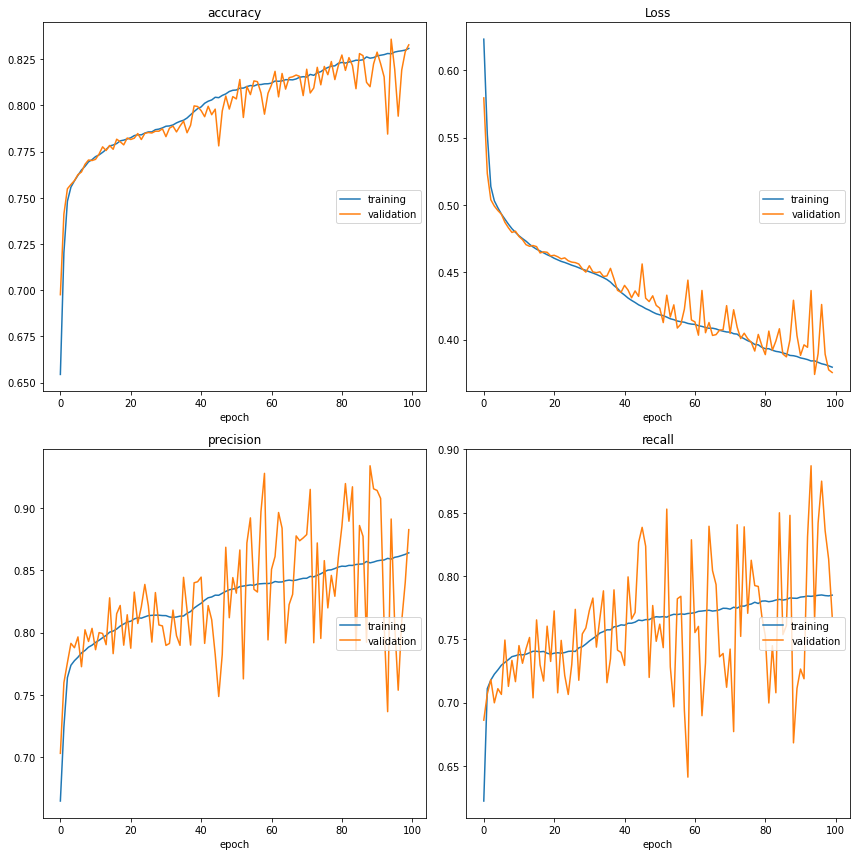

accuracy
	training         	 (min:    0.654, max:    0.831, cur:    0.831)
	validation       	 (min:    0.698, max:    0.836, cur:    0.833)
Loss
	training         	 (min:    0.380, max:    0.623, cur:    0.380)
	validation       	 (min:    0.374, max:    0.580, cur:    0.376)
precision
	training         	 (min:    0.665, max:    0.864, cur:    0.864)
	validation       	 (min:    0.703, max:    0.934, cur:    0.883)
recall
	training         	 (min:    0.622, max:    0.785, cur:    0.785)
	validation       	 (min:    0.641, max:    0.887, cur:    0.768)


In [55]:

model.fit(x_train_std,y_train,epochs=100,batch_size=64,callbacks=[PlotLossesKerasTF()],
          validation_data=(x_test_std,y_test))

 the precision and recall metrics are currently at 0, indicating that the model is not correctly predicting the positive class. This could be due to class imbalance or other issues in the data.

In [56]:
import keras_tuner

In [58]:
# # Try with 1 hyperparameters
def create_model(hp):
    model=Sequential()
    model.add(Input(shape=(20,)))
    model.add(Dense(hp.Choice('units',[10,15,20,25]),activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy',Precision(),Recall()])
    return(model)

In [59]:
tuner=keras_tuner.RandomSearch(create_model,objective='val_loss',max_trials=2)  # if max=4 it become grid search
# tuner=keras_tuner.RandomSearch(create_model,objective='val_accuracy',max_trials=2)

In [60]:
tuner.search(x_train_std,y_train,epochs=20,validation_data=(x_test_std,y_test))

Trial 2 Complete [00h 08m 50s]
val_loss: 0.4669358730316162

Best val_loss So Far: 0.4431672692298889
Total elapsed time: 00h 19m 19s
INFO:tensorflow:Oracle triggered exit


In [61]:
tuner.get_best_models()

In [62]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0 summary
Hyperparameters:
units: 25
Score: 0.4431672692298889

Trial 1 summary
Hyperparameters:
units: 20
Score: 0.4669358730316162


In [63]:
# To get best parameters
tuner.get_best_hyperparameters()[0].values

{'units': 25}

In [64]:
models=tuner.get_best_models(num_models=2)

In [65]:
models

In [66]:
# best model store at 0 location
best_model=models[0]

In [67]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                525       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [69]:
from sklearn.metrics import recall_score

# Assuming you have predictions for your test set
y_pred = best_model.predict(x_test_std)

# Convert predictions to binary values (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate sensitivity
sensitivity = recall_score(y_test, y_pred_binary)
print("Sensitivity:", sensitivity)


Sensitivity: 0.784265179558675


In [70]:
from sklearn.metrics import roc_auc_score

# Assuming you have predictions for the positive class probabilities
y_pred_proba = best_model.predict(x_test_std)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)

print("AUC-ROC: {:.4f}".format(auc_roc))


AUC-ROC: 0.8738


In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


In [76]:
# Calculate Area Under ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # Replace y_pred with your model's predictions
auc = roc_auc_score(y_test, y_pred)  # Replace y_pred with your model's predictions

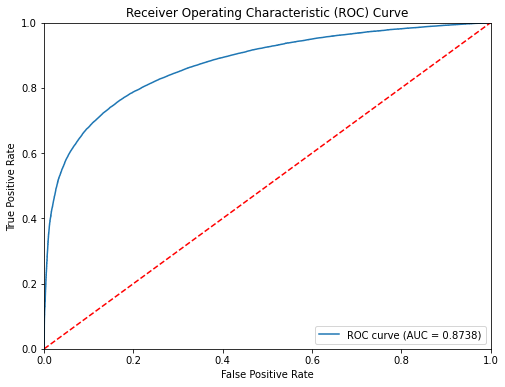

In [77]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.4f})".format(auc))
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


### Conclusion

#### The trained model shows promising performance in predicting the target variable and can be utilized for making accurate predictions. It can assist in various applications, such as risk assessment, loan approval, or identifying potential customers for a certain product or service. The model's ability to capture positive cases, as indicated by sensitivity, and its overall discrimination capability, as indicated by AUC-ROC, make it a valuable tool for decision-making and prediction tasks.